In [1]:
import h3pandas
import geopandas as gpd
import matplotlib as plt
import os 
import pandas as pd
import folium
pd.set_option('display.max_columns', None)
import numpy as np

import sys
sys.path.append("../")
import src.supportCharts as sch

sys.path.append("../")
import src.supportClean as sc

sys.path.append("../")
import src.bibliotheque as bb

In [2]:
path = '../output/geojson/'

In [3]:
gdf = sc.openMultipleGeospatial(path)
print(gdf.shape)
gdf.head()

loading .geojson file: catastro.geojson
loading .geojson file: locales.geojson
loading .geojson file: airbnb.geojson
loading .geojson file: tripadvisor_gdf.pickle
loading .geojson file: fotocasa.geojson
loading .geojson file: tripadvisor.geojson
loading .geojson file: hotels.geojson
all files are appended
(349618, 110)


,longitude,latitude,conditionOfConstruction_clean_hotels,conditionOfConstruction_clean_houses,parcs_hotels,parcs_houses,srf_hotels,srf_houses,geometry,agrupaciones,alcohol,alojamiento,alquillercoche,desconocidos,educacion,fiesta,locutoris,noalim,pastelerias,prox_fresco,restaurants,sex,shops24h,supers,supersbig,vacios,id,host_listings_count,bedrooms,beds,price,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,abnb_tot_price,url,address_clean,owner_clean,name_clean,price_clean_fc,min_price_fc,max_price_fc,med_price_fc,altitude,name,province,city,direction,cuisines,meals,specialDiets,priceRangeNum,priceRange_clean,min_PriceRangeNum,max_PriceRangeNum,avg_PriceRangeNum,med_PriceRangeNum,tp_pricerange_0,tp_pricerange_1,tp_pricerange_2,tp_pricerange_3,reviews_clean,min_reviews_clean,max_reviews_clean,med_reviews_clean,avg_reviews_clean,rating_clean,min_rating_clean,max_rating_clean,avg_rating_clean,med_rating_clean,direction_clean,@fechaActualizacion,@id,language,email,phone,fax,title,body,web,address,zipcode,locality,country,subAdministrativeArea,fechas,cod1_num,cod1_txt,cod2_num,cod2_txt,cod3_num,cod3_txt,cod2_txt_en,cod1_txt_en,cod3_txt_en
0,-3.883745,40.581652,NaN,10.0,NaN,11243556.0,NaN,200.0,POINT (-3.88375 40.58165),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-3.856321,40.549481,NaN,10.0,NaN,11783086.0,NaN,962.0,POINT (-3.85632 40.54948),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-3.849381,40.512833,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-3.84938 40.51283),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-3.837130,40.475883,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-3.83713 40.47588),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-3.837025,40.473014,NaN,10.0,NaN,801.0,NaN,222.0,POINT (-3.83702 40.47301),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [5]:
gdf['price'].value_counts()

price
€€ - €€€     3596
$50.00       1594
$30.00       1554
$25.00       1467
$100.00      1452
             ... 
$358.18         1
$426.69         1
$3,511.00       1
$655.00         1
Comedor         1
Name: count, Length: 1530, dtype: int64

In [6]:
gdf = sc.convertColumnsToNumeric(gdf)

In [7]:
pd.DataFrame(gdf.drop(['geometry'], axis = 1).dtypes).to_csv('test.csv')

In [8]:
list(gdf.dtypes)

[dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'

In [9]:
gdf['med_rating_clean'].value_counts()

med_rating_clean
 4.0    1892
 4.5    1446
 3.5    1299
 5.0     771
 3.0     687
 2.5     288
-1.0     156
 2.0     141
 1.0      77
 1.5      45
 0.0       1
Name: count, dtype: int64

In [10]:
madrid = gpd.read_file('../output/madrid_municipality.geojson').to_crs(epsg=4326)
madrid.drop(madrid.columns.to_list()[9:-1], axis = 1, inplace = True)
madrid.drop(madrid.columns.to_list()[:8], axis = 1, inplace = True)
madrid

,text,geometry
0,Madrid,"MULTIPOLYGON (((-3.88558 40.57446, -3.88549 40..."


# generating hexagons

In [11]:
APERTURE_SIZE = 10

## municipal hexagons

In [12]:
dfh_madrid = madrid.h3.polyfill_resample(APERTURE_SIZE)
print(dfh_madrid.shape)

(39044, 3)


In [13]:
dfh_madrid.head()

,index,text,geometry
h3_polyfill,,,
8a390cb56adffff,0,Madrid,"POLYGON ((-3.61819 40.47554, -3.61901 40.47529..."
8a390cb42d37fff,0,Madrid,"POLYGON ((-3.57794 40.50602, -3.57876 40.50576..."
8a390cb11617fff,0,Madrid,"POLYGON ((-3.76484 40.44314, -3.76566 40.44288..."
8a390cb0938ffff,0,Madrid,"POLYGON ((-3.63875 40.48779, -3.63957 40.48753..."
8a390cb01c97fff,0,Madrid,"POLYGON ((-3.73486 40.49648, -3.73569 40.49622..."


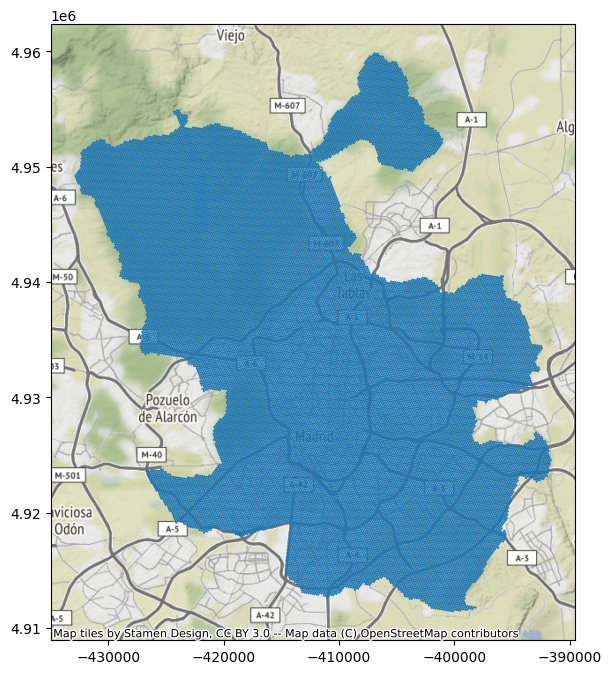

In [14]:
sch.plotMap(dfh_madrid, 'text')

## point hexagons

In [15]:
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.longitude, gdf.latitude)).set_crs('epsg:4326')

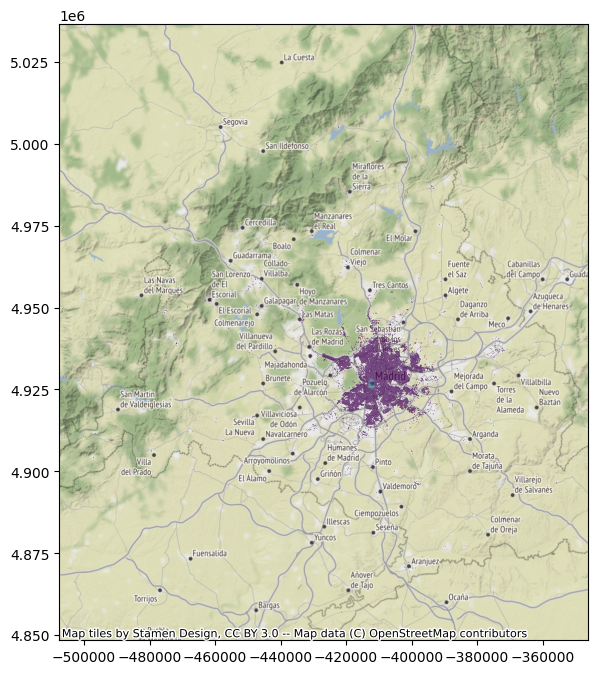

In [16]:
sch.plotMap((gdf#.drop(['lng'], axis = 1)
 .select_dtypes(include=np.number)
 .assign(count=1)
 .h3.geo_to_h3_aggregate(APERTURE_SIZE, operation = 'sum', lat_col = 'latitude', lng_col = 'longitude')).h3.h3_to_geo_boundary(), 'number_of_reviews')

In [30]:
dfh = (gdf.fillna(0)
 .assign(count=1)
 .h3.geo_to_h3_aggregate(APERTURE_SIZE, operation = bb.h3_operations, 
                         lat_col = 'latitude', lng_col = 'longitude')).reset_index()

In [31]:
dfh_polygon = dfh

In [32]:
dfh_polygon.rename(bb.rename_dict, axis = 1, inplace = True)

In [33]:
dfh_polygon.head()

,h3_10,conditionOfConstruction_clean_hotels,conditionOfConstruction_clean_houses,parcs_hotels,parcs_houses,srf_hotels,srf_houses,agrupaciones,alcohol,alojamiento,alquillercoche,desconocidos,local200_n_prox_educacion,fiesta,locutoris,local200_n_prox_noalim,pastelerias,local200_n_prox_fresco,local200_n_restaurants,sex,shops24h,local200_n_prox_supers,local200_n_prox_supersbig,local200_n_vacios,fc_tot_offer,min_price_fc,max_price_fc,med_price_fc,price_clean_fc,local200_n_restaurants_,avg_PriceRangeNum,min_PriceRangeNum,max_PriceRangeNum,med_PriceRangeNum,tp_pricerange_0,tp_pricerange_1,tp_pricerange_2,tp_pricerange_3,min_reviews_clean,max_reviews_clean,med_reviews_clean,avg_reviews_clean,min_rating_clean,max_rating_clean,avg_rating_clean,med_rating_clean,host_listings_count,beds,abnb_tot_price,number_of_reviews,airbnb_tot_offer,reviews_per_month,geometry
0,8a390c0c52f7fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1,0.0,"POLYGON ((-3.78605 39.93956, -3.78686 39.93930..."
1,8a390c14d7affff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,30.0,20.0,40.0,30.0,0.0,0.0,1.0,0.0,603.0,603.0,603.0,603.0,4.0,4.0,4.00,4.00,0.0,0.0,0.0,0.0,1,0.0,"POLYGON ((-3.79137 40.19876, -3.79220 40.19850..."
2,8a390c166387fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,157.0,157.0,157.0,157.0,4.0,4.0,4.00,4.00,0.0,0.0,0.0,0.0,1,0.0,"POLYGON ((-3.92635 40.24428, -3.92717 40.24402..."
3,8a390c16d4b7fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,166.0,166.0,166.0,166.0,4.0,4.0,4.00,4.00,0.0,0.0,0.0,0.0,1,0.0,"POLYGON ((-3.83065 40.25310, -3.83147 40.25284..."
4,8a390c260ad7fff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,0.0,0.0,2,17.5,9.0,32.0,17.5,0.0,1.0,1.0,0.0,100.0,508.0,304.0,304.0,4.0,4.5,4.25,4.25,0.0,0.0,0.0,0.0,2,0.0,"POLYGON ((-3.24358 40.06693, -3.24440 40.06668..."


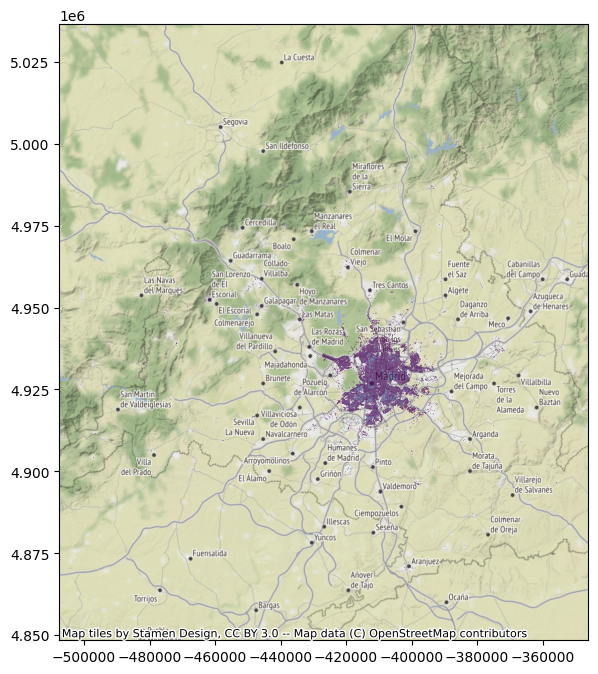

In [34]:
sch.plotMap(dfh_polygon, 'local200_n_vacios')

In [21]:
#sch.foliumMap(dfh_polygon, 'polygon')

In [ ]:
#sc.exportFiles(test, test, 'testMapas')

In [36]:
sc.exportFiles(dfh[['fc_tot_offer', 'airbnb_tot_offer', 'abnb_tot_price', 'price_clean_fc', 'geometry']], 
    dfh[['fc_tot_offer', 'airbnb_tot_offer', 'abnb_tot_price', 'price_clean_fc']], 'grid_competencia_suelo')